### Abstract

Churn prediction has gained significant attention in the financial industry as organizations strive to retain customers and enhance their profitability. This project focuses on utilizing machine learning models and exploratory data analysis (EDA) techniques to predict churn in financial data. Churn, in this context, refers to the phenomenon where customers discontinue their association with a financial institution, such as closing an account or switching to a competitor.

### About the Dataset

DataSource: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset. 

The dataset pertains to ABC Multistate Bank, a fictional financial institution, and contains essential details for analysis. It serves as a valuable resource for studying churn prediction and conducting machine learning models in the banking domain.

### Exploratory data analysis (EDA) 

We will conduct a critical exploration of the data, analyzing patterns and visualizing the interactions between features and the churn label. This will provide valuable insights into the factors influencing customer churn

Let’s first import libraries for EDA, load the data, and print the first five rows:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt
import warnings

# setting some configs to have consistency in the code

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
fig = plt.figure(figsize=(5, 5))
np.set_printoptions(precision=2, suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')
sns.set_palette('Set2')

<Figure size 500x500 with 0 Axes>

In [2]:
df = pd.read_csv('data/churndata.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info(verbose=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


(10000, 12)

The dataset has 10000 rows and 12 columns
There are 2 categorical Features 
- country: Which country the customer holds account
- gender: Whether the customer is a male or a female

Next, there are 9 Numerical Features
- customer_id:Customer ID unique for each customer
- credit_score: Credit score of the customer
- age: Age of the customer
- tenure: How long the customer been in the bank
- balance: How much balance they have in their account
- products_number: Number of products they own
- credit_card: Whether the customer have credit card or not (Yes or No)
- active_member: whether they are active member or inactive member.
- estimated_salary: How much customer are expected to earn

Finally, there’s a prediction feature:
- churn: Whether the customer churned or not (Yes or No)

In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


<b>Check information</b>
- missing data
- duplicates
- outliers

In [5]:
#Get overview of the data
def dataoveriew(df):
    print("Missing values:", df.isnull().sum().values.sum())
    print("Duplicate values:",len(df[df.duplicated()]))

dataoveriew(df)

Missing values: 0
Duplicate values: 0


Seems like there are no missing and duplicate values

Skewness of credit_score :  -0.07
Skewness of age :  1.01
Skewness of balance :  -0.14
Skewness of estimated_salary :  0.0
Skewness of churn :  1.47


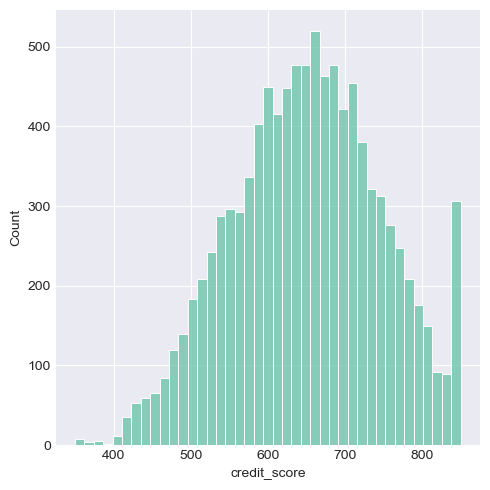

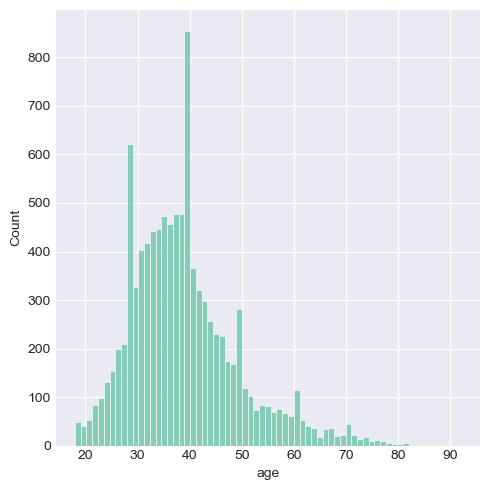

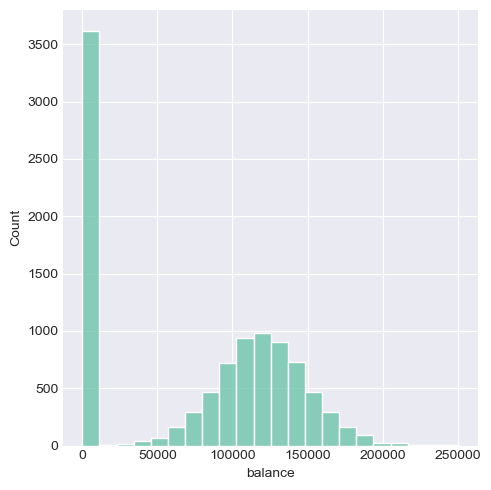

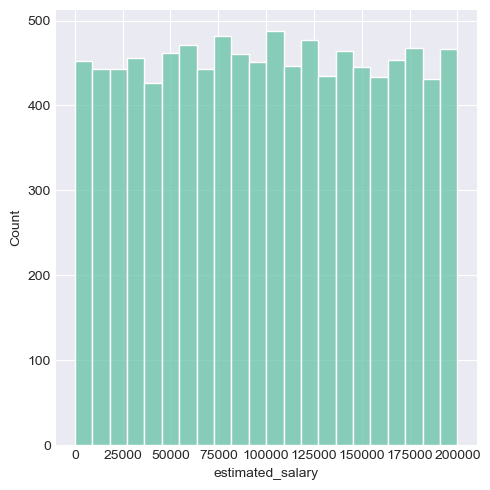

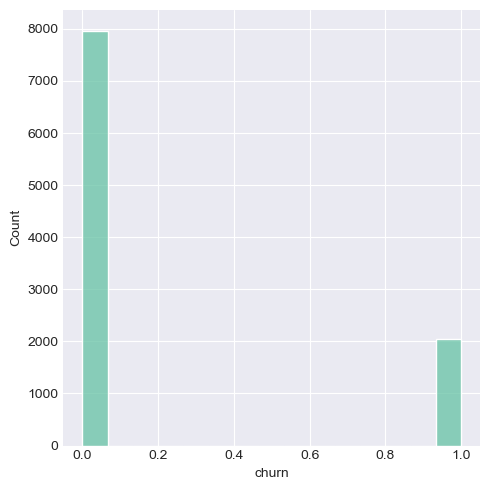

In [6]:
def check_skew(data_col):
    sns.displot(data=df[data_col])
    print(f"Skewness of {data_col} : ",np.round(df[data_col].skew(),2))

skew_col = ['credit_score','age','balance','estimated_salary','churn']
for col in skew_col:
    check_skew(col)

Upon analyzing the dataset, it is observed that the data distribution has minimal skewness and not a significant impact. 
- The age feature indicates a relatively higher concentration of individuals in the 30-40 age range. 
- Furthermore, a considerable number of individuals either have no recorded salary or their salary information is unknown.
- Additionally, the credit score distribution indicates a predominantly favorable credit score among the customers in the dataset.

#### Let’s explore the target variable.

In [7]:
df_feature = df.iloc[:, :-1]
print('df_feature:', df_feature.shape)
df_target = df.iloc[:, -1]
print('df_target:', df_target.shape)

df_feature: (10000, 11)
df_target: (10000,)


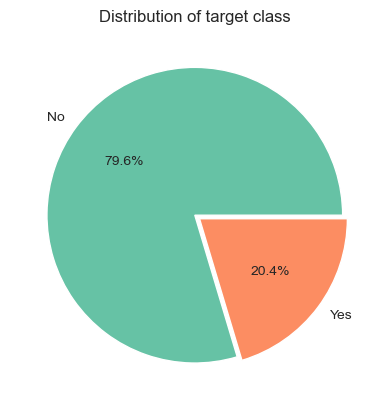

In [8]:
plt.pie(df_target.value_counts(),labels=['No', 'Yes'],autopct='%1.1f%%', explode=[0, 0.04])
plt.title('Distribution of target class')
plt.show()

We’re trying to predict users that left the bank in the previous month. It’s a binary classification problem with an unbalanced target.

- Churn: No – 79.6%
- Churn: Yes – 20.4%

#### Let’s explore  features.
Splitting the features into categorical and numerical

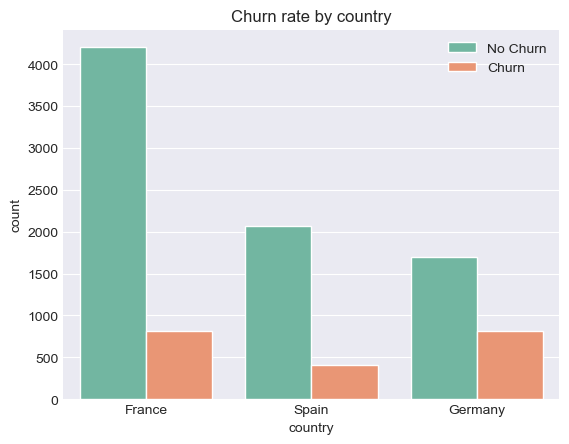

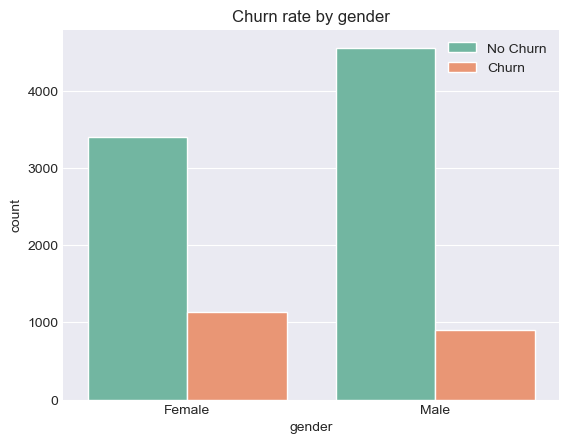

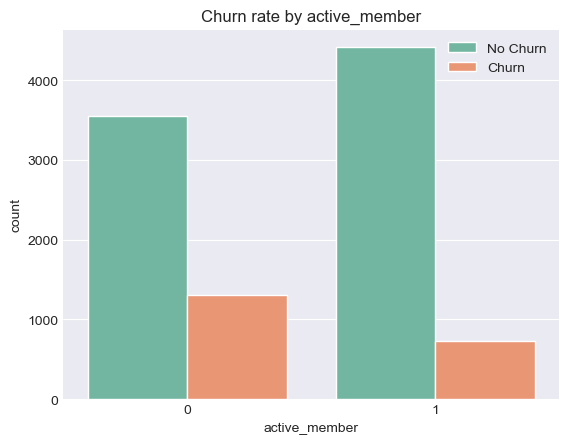

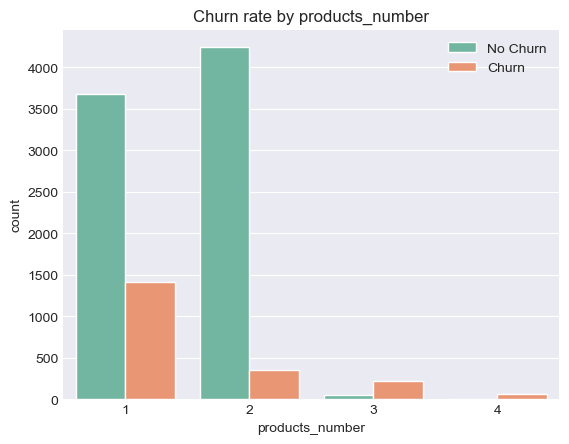

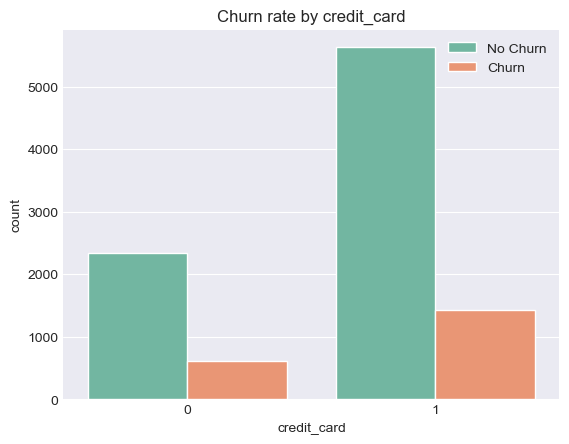

In [9]:
def graph_analysis_catorgorical(data_col):
    fig, ax = plt.subplots()
    sns.countplot(data=df, x=data_col, hue="churn", ax=ax)
    ax.set_title(f'Churn rate by {data_col}')
    ax.legend(labels=['No Churn', 'Churn'])
    plt.show()
categorical_col = ['country','gender','active_member','products_number','credit_card']
for col in categorical_col:
    graph_analysis_catorgorical(col)


In [13]:
# def graph_analysis_numerical(data_col):
#     fig, ax = plt.subplots()
#     sns.histplot(data=df, x=data_col, hue="churn", ax=ax,alpha = 0.5,bins=30,kde=True)
#     ax.set_title(f'Churn rate by {data_col}')
#     ax.legend(labels=['No Churn', 'Churn'])
#     plt.show()
    
# numerical_col =['credit_score','age','tenure','balance','estimated_salary']
# for col in numerical_col:
#     graph_analysis_catorgorical(col)


In [ ]:
encoding
heatmap(correlation)
feature selection
Data rebalancing
primary modeling
hyperparameter tuning

In [14]:
# finding the correlation between the features
corr = df.astype(float).corr()
sns.heatmap(corr,
            linewidths=0.1,
            vmax=1.0,
            square=True,
            linecolor='white',
            annot=True,
            cmap="Blues",
            mask=np.triu(corr))
plt.show()

ValueError: could not convert string to float: 'France'